In [3]:
#!pip install tensorflow
#!pip install opencv-python

In [4]:
from __future__ import absolute_import, division, print_function, unicode_literals
import os

# Importing TF2 & Keras
import tensorflow as tf
from tensorflow import keras

# Using datetime to name folders with dates
import datetime

import numpy as np
import matplotlib.pyplot as plt

# To load internet images we will use these libraries.
from PIL import Image
import requests
from io import BytesIO

# We'll use CV2 to rescale image
import cv2

#!rm -rf ./logs/

# TF Version should be 2.0
print(tf.__version__)

2.14.0


## Importing the dataset
We will use 60,000 images to train the network and 10,000 images to evaluate how accurately the network learned to classify these images. We can access the Fashion MNIST directly from TensorFlow. <br><br>We import and load Fashion MNIST data directly from TensorFlow:

In [5]:
fashion_mnist = keras.datasets.fashion_mnist

In [6]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


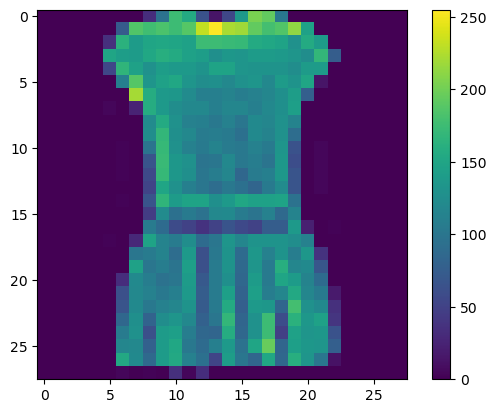

In [7]:
plt.figure()
plt.imshow(train_images[3])
plt.colorbar()
plt.grid(False)
plt.show()

The labels are an array of integers, ranging from 0 to 9. These correspond to the type of clothing that the image represents:

In [8]:
class_names = ['T-shirt', 'Pants', 'Sweater', 'Dress', 'Coat',
'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Boots']

</br>

## Exploring data

In [9]:
train_images[0].shape

(28, 28)

In [10]:
test_images.shape

(10000, 28, 28)

In [11]:
train_labels.shape

(60000,)

In [12]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [13]:
test_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

<br><br>
## Data preprocessing

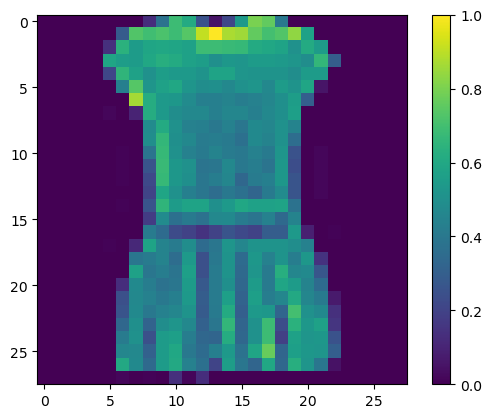

In [14]:
train_images = train_images / 255
test_images = test_images / 255

plt.figure()
plt.imshow(train_images[3])
plt.colorbar()
plt.grid(False)
plt.show()

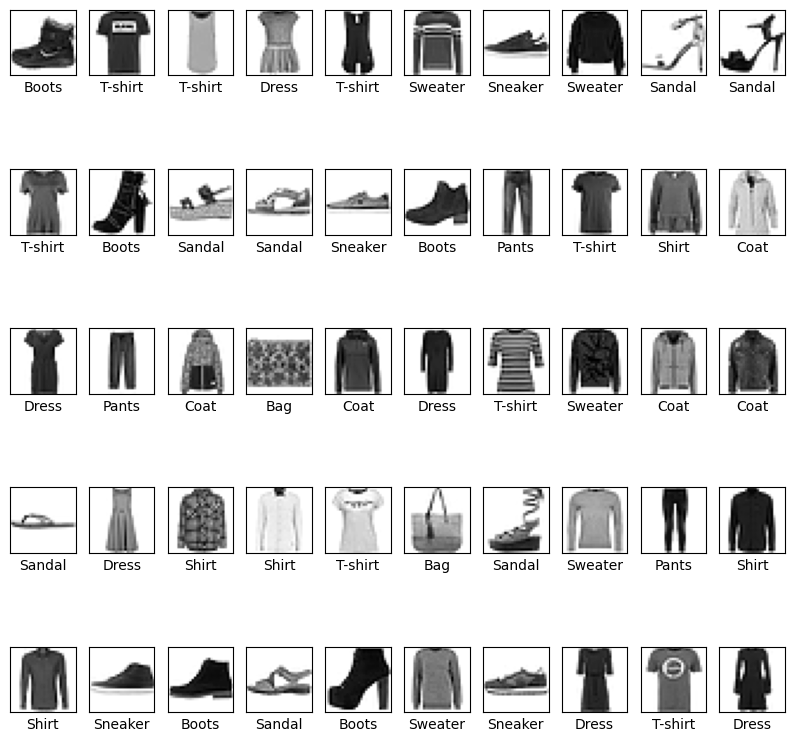

In [15]:
plt.figure(figsize=(10,10))
for i in range(50):
    plt.subplot(5,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

<br><br>
## Configuring the neural network
<img src="https://cdn-images-1.medium.com/max/1200/1*DpMaU1p85ZSgamwYDkzL-A.png">

In [18]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 15)                11775     
                                                                 
 dense_1 (Dense)             (None, 10)                160       
                                                                 
Total params: 11935 (46.62 KB)
Trainable params: 11935 (46.62 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:
model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
              # You can pass multiple metrics, that's why the use of vectors.
             metrics=['accuracy'])

<br><br>
## In classification
### Target with one hot tensorflow encoding -> categorical_crossentropy
<br><br>
img1->    0   |  0   |   0   |   0   |   0   |   0   |  1   |   0   |  0   |   0 <br>
img2->    0   |  0   |   1   |   0   |   0   |   0   |  0   |   0   |  0   |   0 <br>

<img src="https://i.imgur.com/mtimFxh.png">
<br><br><br><br>

#### Target with integers to represent category -> sparse_categorical_crossentropy
<br><br>
img1-> 2<br>
img2-> 6<br>
<br><br><br>
## In regressions 
### loss='mse'
<br><br><br>
## Optimizers

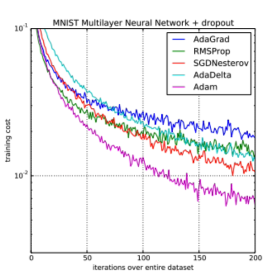

In [54]:
checkpoint_path = "checkpoints/check";
cp_callbacks = tf.keras.callbacks.ModelCheckpoint(checkpoint_path, save_weights_only=True, verbose=1)
model.fit(train_images, train_labels, epochs=10, callbacks = [cp_callbacks])

Epoch 1/10
1868/1875 [============================>.] - ETA: 0s - loss: 0.3500 - accuracy: 0.8756
Epoch 1: saving model to checkpoints\check
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3503 - accuracy: 0.8755
Epoch 2/10
1854/1875 [============================>.] - ETA: 0s - loss: 0.3469 - accuracy: 0.8753
Epoch 2: saving model to checkpoints\check
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3465 - accuracy: 0.8756
Epoch 3/10
1861/1875 [============================>.] - ETA: 0s - loss: 0.3436 - accuracy: 0.8776
Epoch 3: saving model to checkpoints\check
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3435 - accuracy: 0.8775
Epoch 4/10
1862/1875 [============================>.] - ETA: 0s - loss: 0.3401 - accuracy: 0.8781
Epoch 4: saving model to checkpoints\check
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3402 - accuracy: 0.8780
Epoch 5/10
1859/1875 [============================>.] - ETA: 0s - loss: 

In [55]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Accuracy -> ", test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.4181 - accuracy: 0.8535
Accuracy ->  0.8535000085830688


<br><br>
## Let's make predictions

In [56]:
predictions = model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [57]:
predictions[0]

array([2.9048916e-08, 3.4521747e-10, 1.5206427e-07, 1.4080139e-05,
       5.0964600e-06, 2.2837734e-02, 3.6627554e-07, 5.2332032e-02,
       5.4395304e-04, 9.2426652e-01], dtype=float32)

9


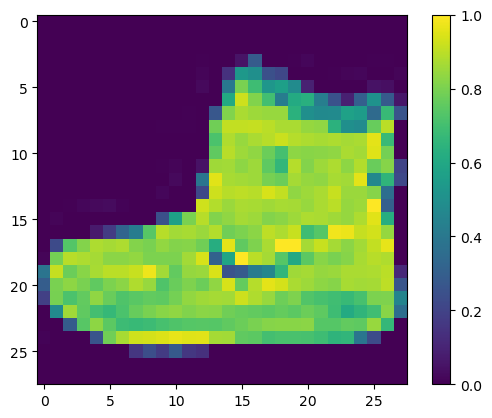

In [58]:
# The 1st image should be boots if the max argument is the 9nth.
print(np.argmax(predictions[0]))
# And so it is.
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

<br><br>
## Let's test the model with an external image unrelated to the dataset
<br><br>
**Very important:**<br><br> The Image to be tested must be entered after receiving the same processing that the training images received

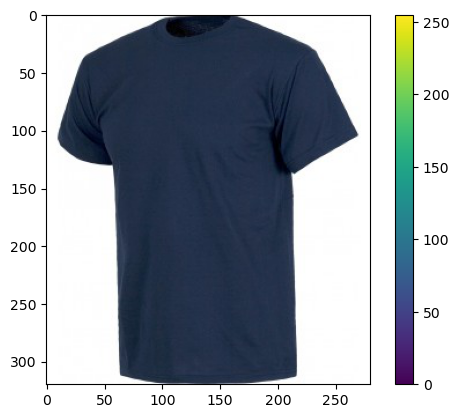

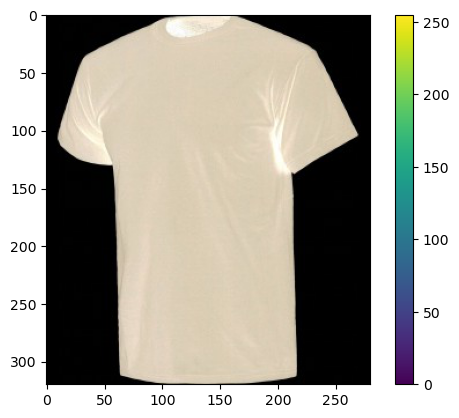

In [59]:
# cargamos una imagen a partir de una url

response = requests.get("https://www.turopalaboral.com/2893-home_default/camiseta-s6600-manga-corta-pack-3-unidades-workteam.jpg")
img = Image.open(BytesIO(response.content))

np_img = np.array(img)

# mostramos la imagen
plt.figure()
plt.imshow(np_img)
plt.colorbar()
plt.grid(False)
plt.show()

#invertimos la imagen
np_img = 255 - np_img

# mostramos la imagen
plt.figure()
plt.imshow(np_img)
plt.colorbar()
plt.grid(False)
plt.show()

In [60]:
np_img.shape

(320, 280, 3)

In [61]:
# we observe that the imported image has 3 dimensions,
# because it's in color.
# that's why we declare this function to convert color image to grayscale
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.333, 0.333, 0.333])

In [62]:
bw_image = rgb2gray(np_img)

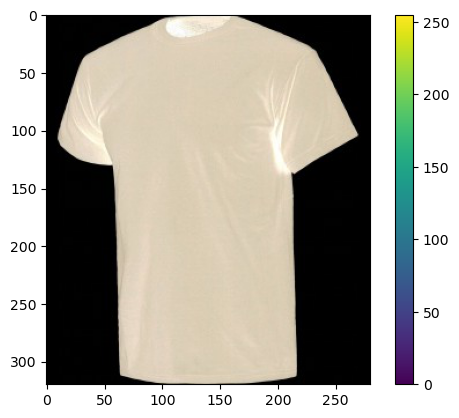

In [63]:
# Showing the b/w image
plt.figure()
plt.imshow(np_img)
plt.colorbar()
plt.grid(False)
plt.show()

In [64]:
bw_image.shape

(320, 280)

In [65]:
# Now for the black and white image we must resize it to 28x28 with dsize parameter.
res = cv2.resize(bw_image, dsize=(28, 28), interpolation=cv2.INTER_CUBIC)

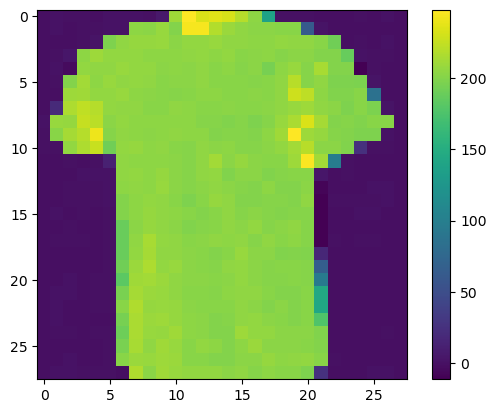

In [66]:
# Show the resized and interpolated image.
plt.figure()
plt.imshow(res)
plt.colorbar()
plt.grid(False)
plt.show()

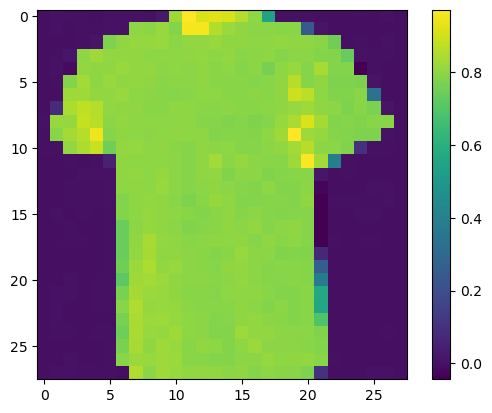

In [67]:
res = res / 255

# Showing the image
plt.figure()
plt.imshow(res)
plt.colorbar()
plt.grid(False)
plt.show()

In [68]:
x = np.zeros((1,28,28))
x.shape

(1, 28, 28)

In [69]:
x[0] = np.array(res)

In [70]:
predictions = model.predict(x)
predictions[0]

1/1 [==============================] - 0s 44ms/step


array([8.3136815e-01, 3.1764909e-08, 4.4723669e-07, 2.1242990e-06,
       1.4189278e-11, 1.0331753e-15, 1.6862924e-01, 4.4068145e-31,
       7.2719990e-09, 1.4382644e-28], dtype=float32)

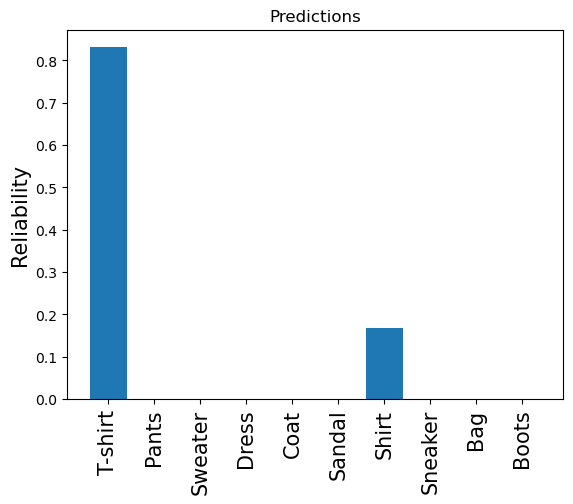

In [71]:
index = np.arange(len(class_names))
plt.bar(index, predictions[0])
plt.ylabel('Reliability', fontsize=15)
plt.xticks(index, class_names, fontsize=15, rotation=90)
plt.title('Predictions')
plt.show()

<br><br>
## We create a new model and test it before training it

In [72]:
model2 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [73]:
loss, acc = model2.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 2.3800 - accuracy: 0.0771


In [74]:
acc

0.0771000012755394

### As we see the performance is terrible
### We load the previously recorded weights and try again

In [75]:
model2.load_weights(checkpoint_path)
loss, acc = model2.evaluate(test_images, test_labels)
acc

313/313 [==============================] - 1s 2ms/step - loss: 0.4181 - accuracy: 0.8535


0.8535000085830688